In [1]:
# Importing libraries
import os
import pandas as pd
import numpy as np

In [2]:
# Paths for data.
Ravdess = "/kaggle/input/ravdess-emotional-speech-audio/"
Tess = r"/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/"
Savee = "/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/"

In [3]:
# Creating RAVDESS dataframe
ravdess_list = os.listdir(Ravdess) # a01, a02, ...

overall_file_emotion = []
overall_file_path = []

ravdess_list.remove('audio_speech_actors_01-24')

for i in ravdess_list:
    actor_contents = os.listdir(Ravdess + i)
    for audio in actor_contents:
        file_name = audio.split('.')[0] # File name
        emotion = int(file_name.split('-')[2]) # Emotion of the audio

        # Append values in list
        overall_file_emotion.append(emotion)
        overall_file_path.append(Ravdess + i + '/' + audio)

data = {
    'Emotions': overall_file_emotion,
    'Path': overall_file_path
}

Ravdess_df = pd.DataFrame(data)
emotion_map = {1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}
Ravdess_df['Emotions'] = Ravdess_df['Emotions'].map(emotion_map)
Ravdess_df.head()

,Emotions,Path
0,surprise,/kaggle/input/ravdess-emotional-speech-audio/A...
1,neutral,/kaggle/input/ravdess-emotional-speech-audio/A...
2,disgust,/kaggle/input/ravdess-emotional-speech-audio/A...
3,disgust,/kaggle/input/ravdess-emotional-speech-audio/A...
4,neutral,/kaggle/input/ravdess-emotional-speech-audio/A...


In [4]:
# Creating TESS dataframe

overall_file_emotion = []
overall_file_path = []

tess_dir = os.listdir(Tess)
for i in tess_dir:
    file_contents = os.listdir(Tess + i)
    for j in file_contents:
        em = j.split('.')[0].split('_')[2]
        if em =='ps':
            overall_file_emotion.append('surprise')
        else:
            overall_file_emotion.append(em)
        overall_file_path.append(Tess + i + '/' + j)

data = {
    'Emotions': overall_file_emotion,
    'Path': overall_file_path
}
tess_df = pd.DataFrame(data)
tess_df.head() # Tess DataFrame

,Emotions,Path
0,fear,/kaggle/input/toronto-emotional-speech-set-tes...
1,fear,/kaggle/input/toronto-emotional-speech-set-tes...
2,fear,/kaggle/input/toronto-emotional-speech-set-tes...
3,fear,/kaggle/input/toronto-emotional-speech-set-tes...
4,fear,/kaggle/input/toronto-emotional-speech-set-tes...


In [5]:
# Creating SAVEE dataframe

savee_dir = os.listdir(Savee)

overall_file_emotion = []
overall_file_path = []

for file in savee_dir:
    overall_file_path.append(Savee + file)
    part = file.split('_')[1]
    em = part[:-6]
    if em=='a':
        overall_file_emotion.append('angry')
    elif em=='d':
        overall_file_emotion.append('disgust')
    elif em=='f':
        overall_file_emotion.append('fear')
    elif em=='h':
        overall_file_emotion.append('happy')
    elif em=='n':
        overall_file_emotion.append('neutral')
    elif em=='sa':
        overall_file_emotion.append('sad')
    else:
        overall_file_emotion.append('surprise')
        
data = {
    'Emotions': overall_file_emotion,
    'Path': overall_file_path
}
savee_df = pd.DataFrame(data)
savee_df.head() # SAVEE DataFrame

,Emotions,Path
0,happy,/kaggle/input/surrey-audiovisual-expressed-emo...
1,fear,/kaggle/input/surrey-audiovisual-expressed-emo...
2,happy,/kaggle/input/surrey-audiovisual-expressed-emo...
3,disgust,/kaggle/input/surrey-audiovisual-expressed-emo...
4,angry,/kaggle/input/surrey-audiovisual-expressed-emo...


In [6]:
# Creating the main dataframe (combination of Ravdess, Tess, Savee)
df = pd.concat([Ravdess_df, tess_df, savee_df], axis = 0)
df.to_csv("overall_dataframe.csv",index=False)
df.head()

,Emotions,Path
0,surprise,/kaggle/input/ravdess-emotional-speech-audio/A...
1,neutral,/kaggle/input/ravdess-emotional-speech-audio/A...
2,disgust,/kaggle/input/ravdess-emotional-speech-audio/A...
3,disgust,/kaggle/input/ravdess-emotional-speech-audio/A...
4,neutral,/kaggle/input/ravdess-emotional-speech-audio/A...


In [7]:
print(df['Emotions'].unique())

['surprise' 'neutral' 'disgust' 'fear' 'sad' 'calm' 'happy' 'angry']


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='Emotions', ylabel='count'>

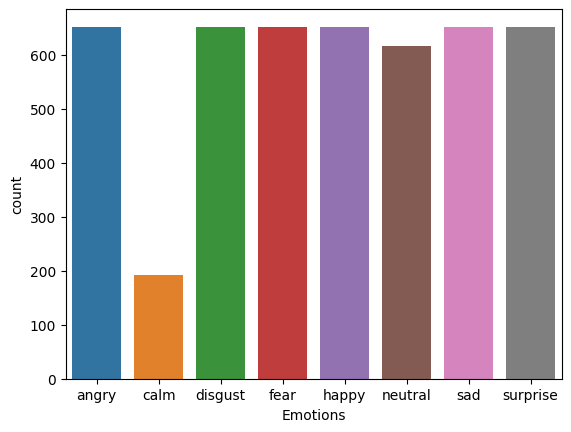

In [8]:
# Count plot
from matplotlib import pyplot as plt
import seaborn as sns
sns.barplot(x='Emotions', y='count', data=df.groupby('Emotions').size().reset_index(name='count'))

In [9]:
from scipy.stats import zscore
import librosa

signal = []
sample_rate = 16000 # Sample rate (16.0 kHz) 
max_pad_len = 49100 # Max pad lenght (3.0 sec)

for index,path in enumerate(df.Path):
    X, sample_rate = librosa.load(path,duration=3,offset=0.5)
    sample_rate = np.array(sample_rate)
    y = zscore(X)
    if len(y) < max_pad_len:    
        y_padded = np.zeros(max_pad_len)
        y_padded[:len(y)] = y
        y = y_padded
    elif len(y) > max_pad_len:
        y = np.asarray(y[:max_pad_len])
    signal.append(y)

In [10]:
inverse_emotion_map = {'neutral':1, 'calm':2, 'happy':3, 'sad':4, 'angry':5, 'fear':6, 'disgust':7, 'surprise':8}
labelss = np.asarray(df['Emotions']).ravel()
labels = []
for i in labelss:
    labels.append(inverse_emotion_map[i])
np.unique(labels)

array([1, 2, 3, 4, 5, 6, 7, 8])

In [11]:
def noisy_signal(signal, snr_low=15, snr_high=30, nb_augmented=2):
    signal_len = len(signal)
    noise = np.random.normal(size=(nb_augmented, signal_len)) # Generate White noise
    s_power = np.sum((signal / (2.0 ** 15)) ** 2) / signal_len # Compute signal
    n_power = np.sum((noise / (2.0 ** 15)) ** 2, axis=1) / signal_len # Compute noise power
    snr = np.random.randint(snr_low, snr_high) # Random SNR: Uniform [15, 30]
    # Compute K coeff for each noise
    K = np.sqrt((s_power / n_power) * 10 ** (- snr / 10))
    K = np.ones((signal_len, nb_augmented)) * K
    # Generate noisy signal
    return signal + K.T * noise

In [12]:
augmented_signal = list(map(noisy_signal, signal))

In [13]:
def mel_spectrogram(y, sr=16000, n_fft=512, win_length=256, hop_length=128, window='hamming', n_mels=128, fmax=4000):
    mel_spect = np.abs(librosa.stft(y, n_fft=n_fft, window=window, win_length=win_length, hop_length=hop_length)) ** 2
    mel_spect = librosa.feature.melspectrogram(S=mel_spect, sr=sr, n_mels=n_mels, fmax=fmax)
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    
    return mel_spect

In [14]:
mel_spect = np.asarray(list(map(mel_spectrogram, signal)))
augmented_mel_spect = [np.asarray(list(map(mel_spectrogram, augmented_signal[i]))) for i in range(len(augmented_signal))]

In [15]:
from sklearn.model_selection import train_test_split
import itertools
MEL_SPECT_train, MEL_SPECT_test, AUG_MEL_SPECT_train, AUG_MEL_SPECT_test, label_train, label_test = train_test_split(mel_spect, augmented_mel_spect,labels, test_size=0.2,random_state=1)

aug_label_train = np.asarray(list(itertools.chain.from_iterable([[label] * 2 for label in label_train])))
AUG_MEL_SPECT_train = np.asarray(list(itertools.chain.from_iterable(AUG_MEL_SPECT_train)))

X_train = np.concatenate((MEL_SPECT_train, AUG_MEL_SPECT_train))
y_train = np.concatenate((label_train, aug_label_train))

X_test = MEL_SPECT_test
y_test = label_test

In [16]:
print("Shape of X_train", X_train.shape)
print("Shape of y_train", y_train.shape)

Shape of X_train (11328, 128, 384)
Shape of y_train (11328,)


In [17]:
win_ts = 128
hop_ts = 64

def frame(x, win_step=128, win_size=64):
    nb_frames = 1 + int((x.shape[2] - win_size) / win_step)
    frames = np.zeros((x.shape[0], nb_frames, x.shape[1], win_size)).astype(np.float32)
    for t in range(nb_frames):
        frames[:,t,:,:] = np.copy(x[:,:,(t * win_step):(t * win_step + win_size)]).astype(np.float32)
    return frames

X_train = frame(X_train, hop_ts, win_ts)
X_test = frame(X_test, hop_ts, win_ts)

In [18]:
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 731.4 kB/s eta 0:00:0000:010:01
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56438 sha256=c6e85d5691f15893d71a8ffc757ef106b8fd776015042ced353a0b95e81413e1
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [19]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(np.ravel(y_train)))
y_test = to_categorical(lb.transform(np.ravel(y_test)))

In [20]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] , X_train.shape[2], X_train.shape[3], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] , X_test.shape[2], X_test.shape[3], 1)

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, TimeDistributed, concatenate
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, BatchNormalization, LeakyReLU, Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import backend as K
from keras.utils import plot_model
from tensorflow.keras.layers import Bidirectional
from sklearn.preprocessing import LabelEncoder

K.clear_session()

input_y = Input(shape=X_train.shape[1:], name='Input_MELSPECT')

y = TimeDistributed(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same'), name='Conv_1_MELSPECT')(input_y)
y = TimeDistributed(BatchNormalization(), name='BatchNorm_1_MELSPECT')(y)
y = TimeDistributed(Activation('elu'), name='Activ_1_MELSPECT')(y)
y = TimeDistributed(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'), name='MaxPool_1_MELSPECT')(y)
y = TimeDistributed(Dropout(0.2), name='Drop_1_MELSPECT')(y)     

y = TimeDistributed(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same'), name='Conv_2_MELSPECT')(y)
y = TimeDistributed(BatchNormalization(), name='BatchNorm_2_MELSPECT')(y)
y = TimeDistributed(Activation('elu'), name='Activ_2_MELSPECT')(y)
y = TimeDistributed(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'), name='MaxPool_2_MELSPECT')(y)
y = TimeDistributed(Dropout(0.2), name='Drop_2_MELSPECT')(y)

y = TimeDistributed(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same'), name='Conv_3_MELSPECT')(y)
y = TimeDistributed(BatchNormalization(), name='BatchNorm_3_MELSPECT')(y)
y = TimeDistributed(Activation('elu'), name='Activ_3_MELSPECT')(y)
y = TimeDistributed(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'), name='MaxPool_3_MELSPECT')(y)
y = TimeDistributed(Dropout(0.2), name='Drop_3_MELSPECT')(y)

y = TimeDistributed(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same'), name='Conv_4_MELSPECT')(y)
y = TimeDistributed(BatchNormalization(), name='BatchNorm_4_MELSPECT')(y)
y = TimeDistributed(Activation('elu'), name='Activ_4_MELSPECT')(y)
y = TimeDistributed(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'), name='MaxPool_4_MELSPECT')(y)
y = TimeDistributed(Dropout(0.2), name='Drop_4_MELSPECT')(y)  

y = TimeDistributed(Flatten(), name='Flat_MELSPECT')(y)                      
                               
y = Bidirectional(LSTM(256, return_sequences=False, dropout=0.2), name='BiLSTM_1')(y)
y = Dense(y_train.shape[1], activation='softmax', name='FC')(y)

model = Model(inputs=input_y, outputs=y)

In [22]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_MELSPECT (InputLayer  [(None, 5, 128, 128, 1)   0         
 )                           ]                                   
                                                                 
 Conv_1_MELSPECT (TimeDistr  (None, 5, 128, 128, 64)   640       
 ibuted)                                                         
                                                                 
 BatchNorm_1_MELSPECT (Time  (None, 5, 128, 128, 64)   256       
 Distributed)                                                    
                                                                 
 Activ_1_MELSPECT (TimeDist  (None, 5, 128, 128, 64)   0         
 ributed)                                                        
                                                                 
 MaxPool_1_MELSPECT (TimeDi  (None, 5, 64, 64, 64)     0     

In [23]:
model.compile(optimizer=SGD(lr=0.01, weight_decay=1e-6, momentum=0.8), loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_acc', patience=30, verbose=1, mode='max')

history = model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50


2023-12-26 16:15:35.547359: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/Drop_1_MELSPECT/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


177/177 [==============================] - 112s 508ms/step - loss: 1.8226 - accuracy: 0.2758 - val_loss: 1.6238 - val_accuracy: 0.3951
Epoch 2/50
177/177 [==============================] - 87s 493ms/step - loss: 1.4448 - accuracy: 0.4457 - val_loss: 1.5263 - val_accuracy: 0.4142
Epoch 3/50
177/177 [==============================] - 87s 493ms/step - loss: 1.1747 - accuracy: 0.5742 - val_loss: 1.2541 - val_accuracy: 0.5360
Epoch 4/50
177/177 [==============================] - 87s 493ms/step - loss: 0.9821 - accuracy: 0.6585 - val_loss: 1.4830 - val_accuracy: 0.5339
Epoch 5/50
177/177 [==============================] - 87s 493ms/step - loss: 0.8667 - accuracy: 0.7009 - val_loss: 1.4940 - val_accuracy: 0.5350
Epoch 6/50
177/177 [==============================] - 87s 492ms/step - loss: 0.8064 - accuracy: 0.7174 - val_loss: 1.6024 - val_accuracy: 0.5085
Epoch 7/50
177/177 [==============================] - 87s 491ms/step - loss: 0.7448 - accuracy: 0.7313 - val_loss: 1.9987 - val_accuracy: 0.

In [24]:
score = model.evaluate(X_test, y_test, verbose=0)
score

[0.6635719537734985, 0.7764830589294434]

In [25]:
model.save('[CNN-BiLSTM]M.h5')
model.save_weights('[CNN-BiLSTM]W.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
# model_name = 'Emotion_Model.h5'
# save_dir = os.path.join(os.getcwd(), 'saved_models')

# if not os.path.isdir(save_dir):
#     os.makedirs(save_dir)
# model_path = os.path.join(save_dir, model_name)
# model.save(model_path)
# print('Save model and weights at %s ' % model_path)

# # Save the model to disk
# model_json = model.to_json()
# with open("model_json.json", "w") as json_file:
#     json_file.write(model_json)

In [27]:
preds = model.predict(X_test)

preds=preds.argmax(axis=1)
preds

30/30 [==============================] - 3s 60ms/step


array([0, 6, 7, 6, 2, 2, 3, 0, 7, 4, 2, 3, 2, 4, 5, 3, 0, 3, 3, 6, 2, 4,
       3, 0, 1, 5, 5, 5, 4, 0, 2, 2, 6, 5, 1, 2, 3, 6, 7, 2, 5, 1, 4, 0,
       4, 4, 6, 4, 4, 5, 3, 4, 1, 6, 6, 3, 3, 3, 6, 6, 2, 4, 7, 4, 3, 0,
       3, 5, 3, 3, 4, 7, 6, 6, 3, 5, 3, 5, 2, 5, 2, 6, 3, 3, 4, 5, 7, 7,
       6, 3, 4, 3, 1, 4, 0, 5, 6, 5, 2, 6, 3, 5, 3, 5, 5, 3, 3, 0, 4, 3,
       0, 2, 3, 4, 5, 4, 4, 5, 2, 2, 7, 3, 4, 3, 4, 7, 7, 6, 4, 7, 2, 3,
       5, 6, 6, 3, 1, 0, 1, 5, 4, 3, 6, 2, 2, 7, 2, 2, 5, 3, 4, 1, 2, 7,
       6, 2, 5, 2, 5, 3, 4, 0, 0, 3, 7, 5, 7, 2, 3, 0, 0, 7, 7, 6, 6, 2,
       3, 6, 4, 5, 1, 6, 5, 2, 5, 3, 3, 3, 6, 3, 3, 6, 6, 5, 4, 0, 4, 6,
       2, 7, 1, 3, 5, 7, 6, 4, 3, 7, 0, 4, 4, 0, 1, 7, 0, 6, 5, 7, 6, 2,
       0, 6, 7, 5, 5, 7, 0, 3, 3, 2, 2, 1, 2, 5, 5, 6, 1, 3, 4, 6, 2, 6,
       7, 2, 0, 2, 7, 4, 6, 3, 3, 6, 7, 6, 3, 7, 3, 4, 1, 7, 4, 3, 3, 6,
       3, 3, 3, 0, 2, 2, 0, 6, 7, 3, 7, 7, 3, 6, 3, 0, 4, 7, 3, 7, 2, 6,
       2, 3, 6, 3, 1, 4, 5, 0, 4, 2, 3, 3, 4, 6, 3,

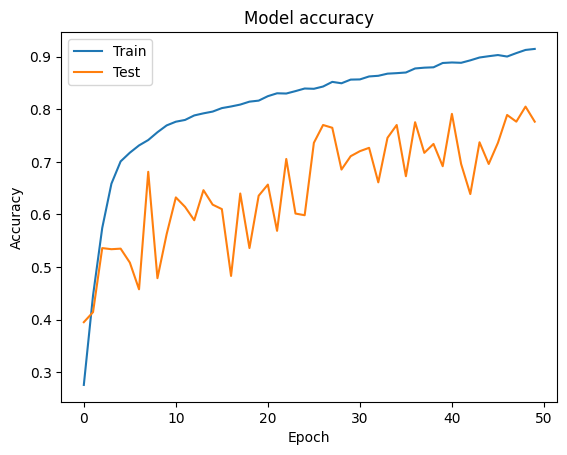

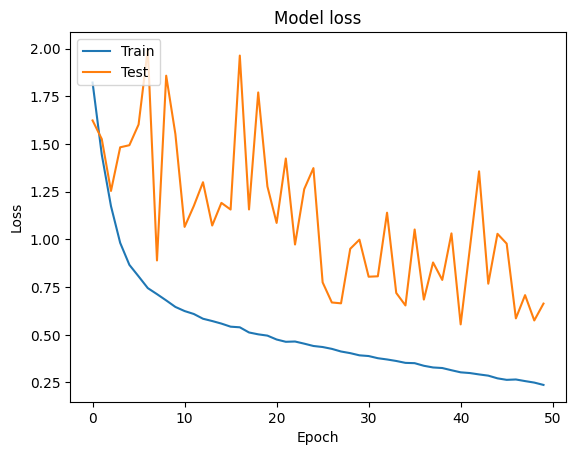

In [28]:
# Plot training history
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# Call the function to plot training history
plot_training_history(history)

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predictions on the test set
y_pred = model.predict(X_test)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)  # Assuming y_test is one-hot encoded

# Accuracy
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f'Accuracy: {accuracy:.4f}')

30/30 [==============================] - 2s 60ms/step
Accuracy: 0.7765


In [30]:
# Precision
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')
print(f'Precision: {precision:.4f}')

Precision: 0.8136


In [31]:
# Recall
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
print(f'Recall: {recall:.4f}')

Recall: 0.7765


In [32]:
# F1 Score
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')
print(f'F1 Score: {f1:.4f}')

F1 Score: 0.7833


In [33]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[ 91   7   1  19   0   0   3   0]
 [  0  26   0  17   0   0   1   0]
 [  1   3 103  12   7   4   7   4]
 [  0  12   1 115   0   1   1   0]
 [  1   0   4   3  97   0   9   1]
 [  0   3   9  26   5  96   1   1]
 [  0   0   3  11   3   1  92   0]
 [  0   0  10   1   0   1  17 113]]


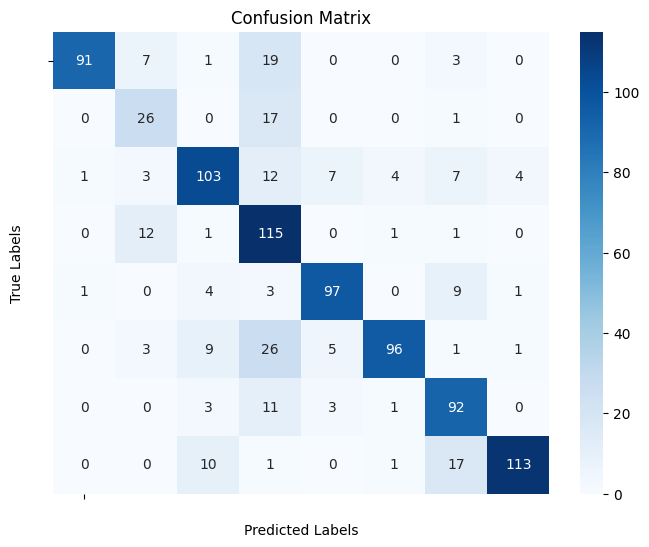

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=" ", yticklabels=" ")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()